In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json


In [34]:
df = pd.read_csv('lot_records.csv')
df['time'] = pd.to_datetime(df['time'], unit='s') #.dt.round('30min')
del df['nice_time']
df

,id,status,time
0,56,active,2023-02-02 14:30:00.796263936
1,64,na,2023-02-02 14:30:00.796263936
2,110,na,2023-02-02 14:30:00.796263936
3,73,na,2023-02-02 14:30:00.796263936
4,122,available,2023-02-02 14:30:00.796263936
...,...,...,...
21063,68,na,2023-02-07 18:00:00.362173952
21064,69,na,2023-02-07 18:00:00.362173952
21065,42,active,2023-02-07 18:00:00.362173952
21066,84,na,2023-02-07 18:00:00.362173952


In [35]:
df2 = pd.pivot(df, index='id', columns='time').status
no_status = ((df2 == 'na' )).all(axis='columns')
just_active = ((df2 == 'active' )).all(axis='columns')
lot_ids_without_status = set(df2[no_status | just_active].index)

In [36]:


# df2 = df2[~no_status & ~just_active]

time_columns = df2.columns

df2['grade'] = df2.apply(lambda row: row.map(dict(available=0, few=0.8, full=1, na=0, active=0)).sum(), axis='columns')
df2 = df2.sort_values(by=['grade'], ascending=False)

name_df = pd.read_csv('lot_names.csv', index_col=0)
df2['name'] = name_df['name']

df2 = df2.reindex(['name', 'grade'] + list(time_columns), axis='columns')

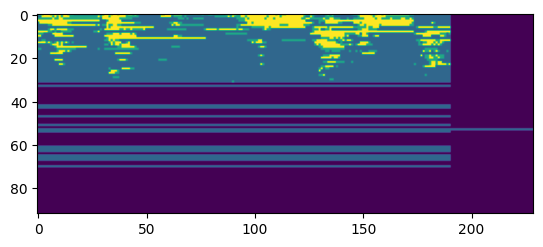

In [37]:

numeric_data = df2.drop(['grade', 'name'], axis='columns').applymap(lambda x: {'available':0, 'few': 0.8, 'full': 2, 'na': -1, 'active': -1}[x]).to_numpy()
plt.imshow(numeric_data)
plt.show()

In [32]:
nice_json_dict = dict()
for column in df2:
    if column in ['grade', 'name']:
        continue
    key = column.isoformat()
    values = df2[column].to_dict()
    nice_json_dict[key] = values

with open('parsed_lot_records.json', 'w')  as f:
    json.dump(nice_json_dict, f)

